In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report
    
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("CampusPlacement.csv")

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
df.drop(['sl_no'], axis = 1, inplace = True) #dropping insignificant values
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


In [6]:
df['salary'].fillna(int(df['salary'].mean()), inplace=True)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,288655.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [13]:
df.info()
df['degree_t'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  salary          215 non-null    float64
 13  Stat            215 non-null    object 
dtypes: float64(6), object(8)
memory usage: 23.6+ KB


Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64

In [15]:
df.describe()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,67.303395,66.333163,66.370186,72.100558,62.278186,288655.279070
std,10.827205,10.897509,7.358743,13.275956,5.833385,77457.900102
min,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,60.600000,60.900000,61.000000,60.000000,57.945000,250000.000000
50%,67.000000,65.000000,66.000000,71.000000,62.000000,288655.000000
75%,75.700000,73.000000,72.000000,83.500000,66.255000,288655.000000
max,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


# EDA

<AxesSubplot:>

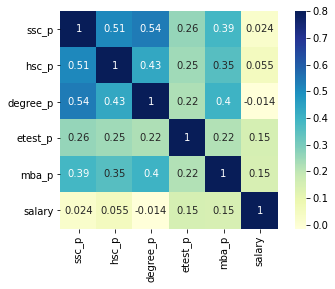

In [17]:
sns.heatmap(df.corr(), vmax=.8, square=True, annot=True,cmap="YlGnBu")

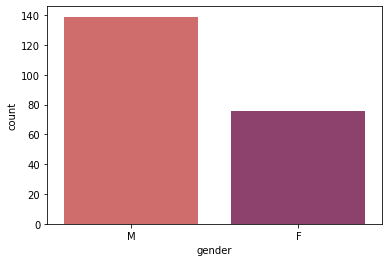

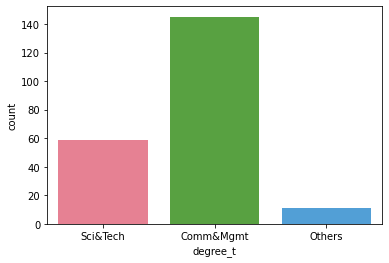

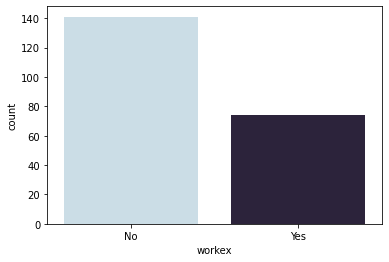

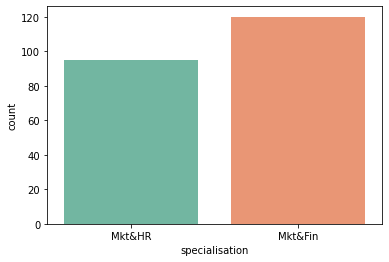

In [21]:
sns.countplot(data = df, x = "gender", palette = "flare")
plt.show()

sns.countplot(data = df, x = "degree_t", palette = "husl")
plt.show()

sns.countplot(data = df, x = "workex", palette = "ch:s=.25,rot=-.25")
plt.show()

sns.countplot(data = df, x = "specialisation", palette = "Set2")
plt.show()

IN THE ABOVE GRAPH, WE CAN SEE :-
NUMBER OF MALEs ARE MORE THAN NUMBER OF FEMALES

NUMBER OF PEOPLE HAS BEEN GRADUATED THROUGH COMMERCE & MANAGEMENT FIELD, FOLLOWED BY SCIENCE AND TECHNOLOGY AND OTHER STREAMS

LARGE NUMBER OF PEOPLE DO NOT HAVE WORK EXPERIENCE

A DECENT AMOUNT OF INDIVIUALS ARE SPECIALIZED IN MARKETING & FINANCE

In [87]:
# compare 

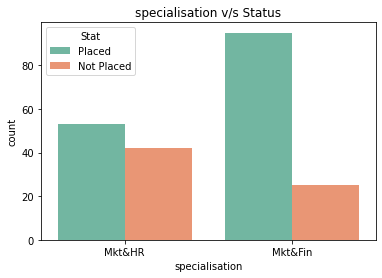

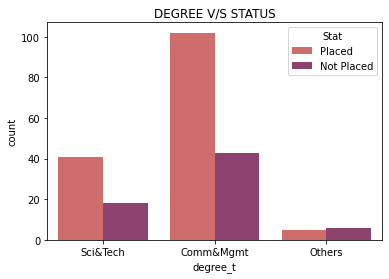

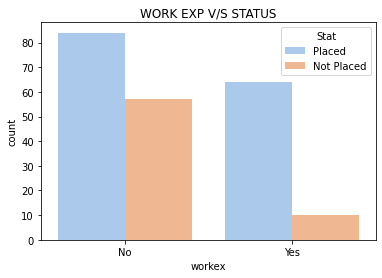

In [27]:
sns.countplot(data = df, x = "specialisation",hue = 'Stat', palette = "Set2")
plt.title("specialisation v/s Status")
plt.show()

sns.countplot(data = df, x = "degree_t", hue = 'Stat', palette = "flare")
plt.title("DEGREE V/S STATUS")
plt.show()

sns.countplot(data = df, x = "workex", hue = 'Stat', palette = "pastel")
plt.title("WORK EXP V/S STATUS")
plt.show()

MARKETING & FINANCE ARE MORE LIKELY TO BE PLACED.

THE INDIVIUALS WHO HOLDS COMMERCE & MANAGEMENT DEGREE ARE LIKELY TO PLACED.

THE INDIVIUALS ARE NOT EXPERIENCED THOUGH , THEY ARE LIKELY TO BE PLACED.

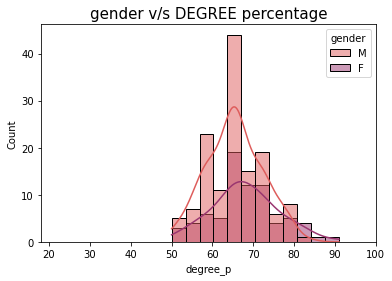

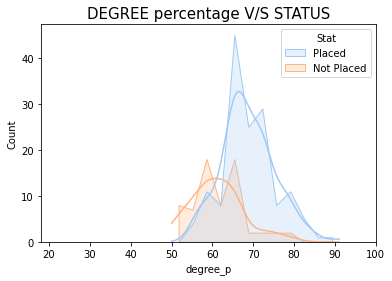

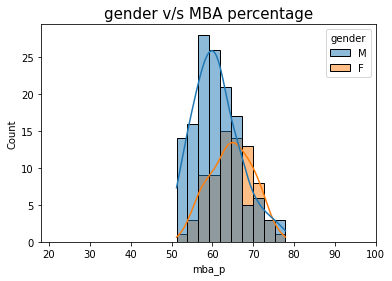

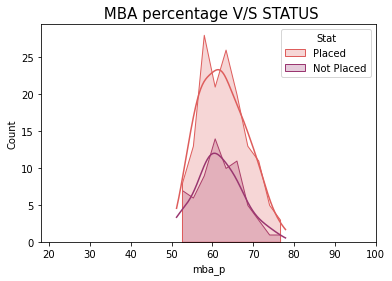

In [28]:
sns.histplot(data=df, x="degree_p", hue="gender", kde = True, palette = "flare")
plt.title('gender v/s DEGREE percentage' , fontsize=15)
plt.xlim([18,100])
plt.show()

sns.histplot(data=df, x="degree_p", hue="Stat", kde = True, element= 'poly',palette = "pastel")
plt.title('DEGREE percentage V/S STATUS' , fontsize=15)
plt.xlim([18,100])
plt.show()

sns.histplot(data=df, x="mba_p", hue="gender", kde = True)
plt.title('gender v/s MBA percentage' , fontsize=15)
plt.xlim([18,100])
plt.show()

sns.histplot(data=df, x="mba_p", hue="Stat", kde = True, element= 'poly',palette = "flare")
plt.title(' MBA percentage V/S STATUS' , fontsize=15)
plt.xlim([18,100])
plt.show()

IN THIS ABOVE GRAPH:-

MAXIMUM NUMBER OF PEOPLE HAS SCORED IN RANGE 62%- 65% IN THEIR DEGREE RESPECTIVELY.

WE CAN SEE PERCENTAGE IN RANGE 62% - 90% ARE LIKELY TO BE PLACED.

MAXIMUM NUMBER OF PEOPLE HAS SCORED IN RANGE 58% - 65% IN THEIR MBA RESPECTIVELY.

MBA % IN RANGE 52% - 75% ARE HIGLY LIKED TO BE PLACED

# DATA PREPROCESSING

In [29]:
x = df.iloc[:, :13]
y = df.iloc[:, 13]
x

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,288655.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,204000.0


# Label Encoding 

In [30]:
#ONE HOT ENCODING
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [5, 7])], remainder = 'passthrough')
x = np.array(ct.fit_transform(x))
print(x.shape)

(215, 17)


In [31]:
#label encoding
le = LabelEncoder()
x[:, 6] = le.fit_transform(x[:, 6]) #gender
x[:, 8] = le.fit_transform(x[:, 8]) #ssc_b
x[:, 10] = le.fit_transform(x[:, 10]) #hsc_b
x[:, 12] = le.fit_transform(x[:, 12]) #workexp
x[:, 14] = le.fit_transform(x[:, 14]) #specialisation
x[:, 6] = le.fit_transform(x[:, 6])

In [32]:
y = le.fit_transform(y)
y

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

# MODEL SELECTION

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [64]:
#logistic regression
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()
m1.fit(x_train, y_train)

m1_pred = m1.predict(x_test)
m1_pred
print("logistic regression", "\n")
print("accuracy score :", accuracy_score(m1_pred, y_test))
print("precision score: ", precision_score(m1_pred, y_test))
print("f1 score: ", f1_score(m1_pred, y_test))
print("auc score: ", roc_auc_score(m1_pred, y_test))
print("recall score : ", recall_score(m1_pred, y_test))
print("confusion matrix", confusion_matrix(m1_pred, y_test))

logistic regression 

accuracy score : 0.8837209302325582
precision score:  0.9285714285714286
f1 score:  0.912280701754386
auc score:  0.8768472906403942
recall score :  0.896551724137931
confusion matrix [[12  2]
 [ 3 26]]


In [73]:
#knn
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier()
m2.fit(x_train, y_train)

m2_pred = m2.predict(x_test)
m2_pred
print("Knn", "\n")
print("accuracy score :", accuracy_score(m2_pred, y_test))
print("precision score: ", precision_score(m2_pred, y_test))
print("f1 score: ", f1_score(m2_pred, y_test))
print("auc score: ", roc_auc_score(m2_pred, y_test))
print("recall score : ", recall_score(m2_pred, y_test))
print("confusion matrix", confusion_matrix(m2_pred, y_test))

Knn 

accuracy score : 0.7441860465116279
precision score:  0.9285714285714286
f1 score:  0.8253968253968255
auc score:  0.7464285714285714
recall score :  0.7428571428571429
confusion matrix [[ 6  2]
 [ 9 26]]


In [74]:
#svm
from sklearn.svm import SVC
m3 = SVC()
m3.fit(x_train, y_train)

m3_pred = m3.predict(x_test)
m3_pred
print("SVC", "\n")
print("accuracy score :", accuracy_score(m3_pred, y_test))
print("precision score: ", precision_score(m3_pred, y_test))
print("f1 score: ", f1_score(m3_pred, y_test))
print("auc score: ", roc_auc_score(m3_pred, y_test))
print("recall score : ", recall_score(m3_pred, y_test))
print("confusion matrix", confusion_matrix(m3_pred, y_test))

SVC 

accuracy score : 0.9069767441860465
precision score:  1.0
f1 score:  0.9333333333333333
auc score:  0.9375
recall score :  0.875
confusion matrix [[11  0]
 [ 4 28]]


In [75]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
m4 = DecisionTreeClassifier()
m4.fit(x_train, y_train)

m4_pred = m4.predict(x_test)
m4_pred
print("decision Tree", "\n")
print("accuracy score :", accuracy_score(m4_pred, y_test))
print("precision score: ", precision_score(m4_pred, y_test))
print("f1 score: ", f1_score(m4_pred, y_test))
print("auc score: ", roc_auc_score(m4_pred, y_test))
print("recall score : ", recall_score(m4_pred, y_test))
print("confusion matrix", confusion_matrix(m4_pred, y_test))

decision Tree 

accuracy score : 0.7906976744186046
precision score:  1.0
f1 score:  0.8615384615384616
auc score:  0.8783783783783784
recall score :  0.7567567567567568
confusion matrix [[ 6  0]
 [ 9 28]]


In [76]:
#random forest
from sklearn.ensemble import RandomForestClassifier
m5 = RandomForestClassifier()
m5.fit(x_train, y_train)

m5_pred = m5.predict(x_test)
m5_pred
print("Random Forest", "\n")
print("accuracy score :", accuracy_score(m5_pred, y_test))
print("precision score: ", precision_score(m5_pred, y_test))
print("f1 score: ", f1_score(m5_pred, y_test))
print("auc score: ", roc_auc_score(m5_pred, y_test))
print("recall score : ", recall_score(m5_pred, y_test))
print("confusion matrix", confusion_matrix(m5_pred, y_test))

Random Forest 

accuracy score : 0.8837209302325582
precision score:  1.0
f1 score:  0.9180327868852458
auc score:  0.9242424242424243
recall score :  0.8484848484848485
confusion matrix [[10  0]
 [ 5 28]]


# Hyperparameter tuning

In [78]:
#logistic regression
from sklearn.model_selection import GridSearchCV 

params = {'C':[5, 10, 15, 20],'random_state':[0]}
grid1 = GridSearchCV(estimator = m1, param_grid = params, scoring = 'accuracy', cv = 10)
grid1.fit(x_train, y_train)
best_acc = grid1.best_score_
best_param = grid1.best_params_
print("best parameters: ", best_param)

print('best accuracy:', best_acc*100)

best parameters:  {'C': 5, 'random_state': 0}
best accuracy: 84.83660130718954


In [79]:
#knn 
params = {
    'n_neighbors' : [5, 25],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}
grid2 = GridSearchCV(estimator = m2 , param_grid = params , scoring = "accuracy", cv = 10)
grid2.fit(x_train, y_train)
best_Acc = grid2.best_score_
best_param = grid2.best_params_
print("best parameters: ", best_param)
print("best accuracy :", best_Acc*100)

best parameters:  {'algorithm': 'auto', 'n_neighbors': 25, 'weights': 'distance'}
best accuracy : 80.22875816993465


In [80]:
#svc
params ={'C':[10, ],'kernel':['linear', 'rbf'],'random_state':[0]}
grid3 = GridSearchCV(estimator = m3, param_grid = params , scoring = "accuracy", cv = 10)
grid3.fit(x_train, y_train)
best_acc = grid3.best_score_
param = grid3.best_params_
print("best accuracy :", best_acc*100)
print("best parameters :", param )

best accuracy : 87.74509803921569
best parameters : {'C': 10, 'kernel': 'rbf', 'random_state': 0}


In [81]:
#decison
params = {"criterion": ["gini", "entropy"], "random_state": [0] } 
grid4 = GridSearchCV(estimator = m4, param_grid = params, scoring = "accuracy", cv = 10)
grid4.fit(x_train, y_train)
best_acc = grid4.best_score_
best_param = grid4.best_params_
print("best acuracy: ", best_acc*100)
print("best parameters : ", best_param )

best acuracy:  98.26797385620915
best parameters :  {'criterion': 'entropy', 'random_state': 0}


In [83]:
#random forest
params = {"n_estimators": [100, 200, 300], "criterion": ["gini", "entropy"],"random_state":[42] }
grid5= GridSearchCV(estimator = m5, param_grid = params , scoring = "accuracy", cv = 10)
grid5.fit(x_train, y_train)
best_Acc = grid5.best_score_
best_param = grid5.best_params_
print("best accuracy :", best_Acc*100)
print("best parameters : ", best_param)

best accuracy : 96.4705882352941
best parameters :  {'criterion': 'entropy', 'n_estimators': 300, 'random_state': 42}


In [62]:
#selecting random forest and decision tree as it shows the highest accuracies
#fiiting random forest model
model1 =  RandomForestClassifier(criterion = 'entropy', n_estimators = 300, random_state = 42)
model1.fit(x_train, y_train)

model_pred1 = model1.predict(x_test)
model_pred1
print("accuracy score : ", accuracy_score(model_pred1, y_test))
print("precision score:", precision_score(model_pred1, y_test))
print("recall score: ", recall_score(model_pred1, y_test))
print("f1_score :", f1_score(model_pred1, y_test))
print("auc score : ", roc_auc_score(model_pred1, y_test))
print("confusion matrix", confusion_matrix(model_pred1, y_test))

accuracy score :  0.8604651162790697
precision score: 1.0
recall score:  0.8235294117647058
f1_score : 0.9032258064516129
auc score :  0.9117647058823529
confusion matrix [[ 9  0]
 [ 6 28]]


In [63]:
#fitting decision tree
model2 =  DecisionTreeClassifier(criterion = 'gini', random_state = 0)
model2.fit(x_train, y_train)

model_pred2 = model2.predict(x_test)
model_pred2
print("accuracy score : ", accuracy_score(model_pred2, y_test))
print("precision score:", precision_score(model_pred2, y_test))
print("recall score: ", recall_score(model_pred2, y_test))
print("f1_score :", f1_score(model_pred2, y_test))
print("auc score : ",  roc_auc_score(model_pred2, y_test))
print("confusion matrix", confusion_matrix(model_pred2, y_test))

accuracy score :  0.7906976744186046
precision score: 1.0
recall score:  0.7567567567567568
f1_score : 0.8615384615384616
auc score :  0.8783783783783784
confusion matrix [[ 6  0]
 [ 9 28]]


# Visualizing Confusion Matrix

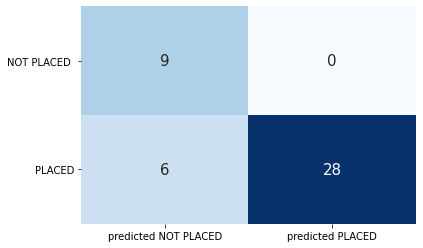

In [85]:
cm = confusion_matrix(model_pred1, y_test)
sns.heatmap(cm, cmap = 'Blues',annot = True, annot_kws= {'Fontsize': 15},cbar = False,  yticklabels = ["NOT PLACED ", "PLACED"], xticklabels = ['predicted NOT PLACED', 'predicted PLACED'])
plt.yticks(rotation= 0)
plt.show()

# Roc AUC Curve

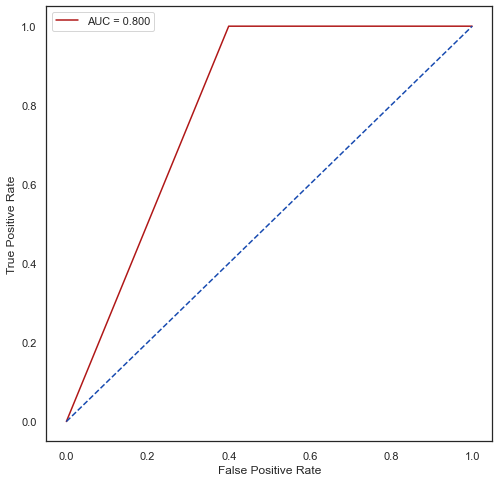

In [86]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, model_pred1)
roc_auc = auc(false_positive_rate, true_positive_rate)

sns.set_theme(style = 'white')
plt.figure(figsize = (8, 8))
plt.plot(false_positive_rate,true_positive_rate, color = '#b01717', label = 'AUC = %0.3f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

After tuning the hyperparameters we can see that, random forest shows the 86% accuracy. Random Forest model fits the best for this dataset.